# Basic Soccer Event Visualization

Let's start by calling in our libraries and data.

In [8]:
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(ggsoccer))
suppressMessages(library(soccermatics))
suppressMessages(library(StatsBombR))

event_data <- StatsBombFreeEvents()

[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."
[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."
[1] "Whilst we are keen to share data and facilitate research, we also urge you to be responsible with the data. Please register your details on https://www.statsbomb.com/resource-centre and read our User Agreement carefully."


Let's visualize some passes for Yuki Nagasato.

In [9]:
passes_yuki <- event_data %>% filter(type.name == "Pass") %>% filter(pass.outcome.name %in% c(NA, "Incomplete", "Out")) %>% filter(player.name == "Yuki Nagasato")

passes_yuki$start_x <- NA
passes_yuki$start_y <- NA
passes_yuki$end_x <- NA
passes_yuki$end_y <- NA

for(r in 1:nrow(passes_yuki)) {
    start_loc <- unlist(passes_yuki$location[r])
    passes_yuki$start_x[r] <- start_loc[1]
    passes_yuki$start_y[r] <- start_loc[2]
    end_loc <- unlist(passes_yuki$pass.end_location[r])
    passes_yuki$end_x[r] <- end_loc[1]
    passes_yuki$end_y[r] <- end_loc[2]
}

Warning message:
“Removed 39 rows containing missing values (geom_segment).”

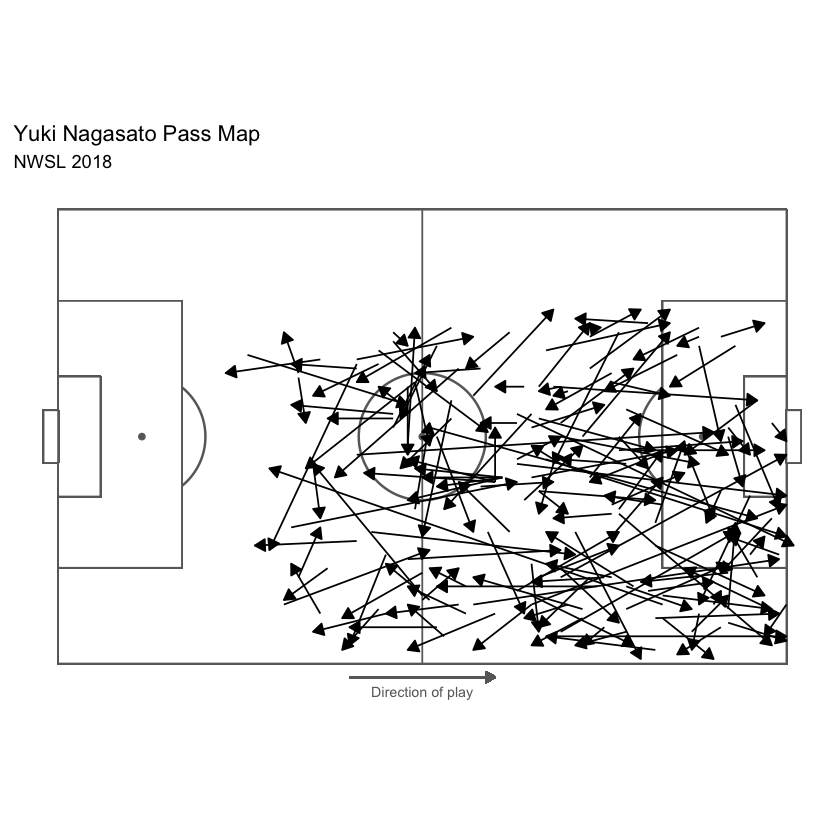

In [10]:
ggplot(passes_yuki) +
  annotate_pitch() +
  geom_segment(aes(x = start_x, y = start_y, xend = end_x, yend = end_y),
               arrow = arrow(length = unit(0.25, "cm"),
                             type = "closed")) +
  theme_pitch() +
  direction_label() +
  xlim(-1, 101) +
  ylim(-5, 101) +
  ggtitle("Yuki Nagasato Pass Map", 
          "NWSL 2018")

We can also do a heatmap of the locations from where Yuki initiates her passes.

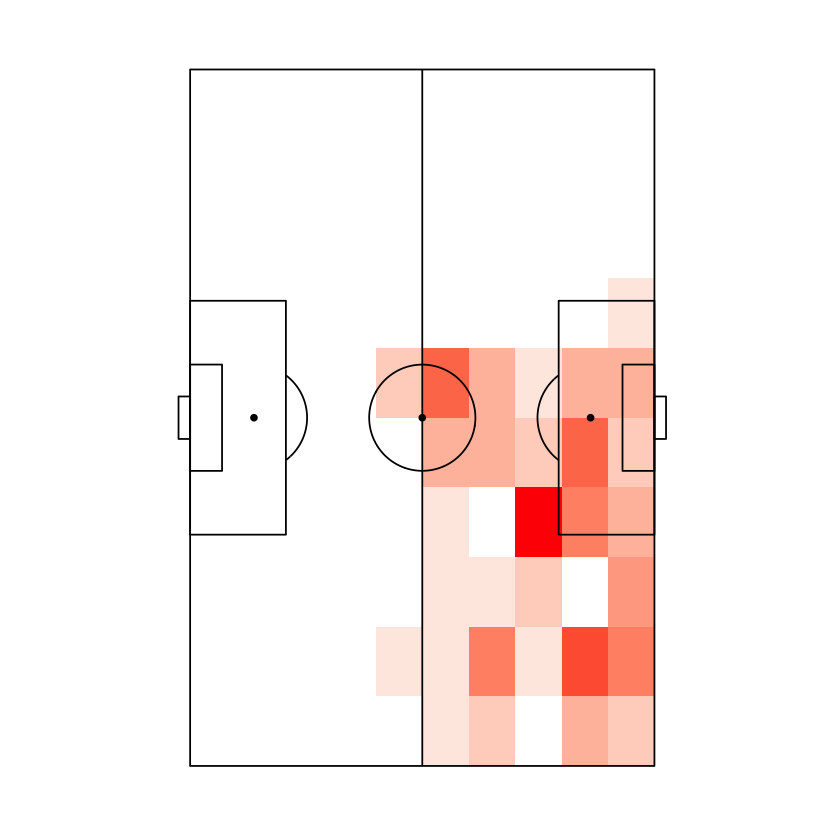

In [46]:
passes_yuki_sm <- passes_yuki %>% select(start_x, start_y)
names(passes_yuki_sm) <- c("x", "y")
soccerHeatmap(passes_yuki_sm, lengthPitch = 80, widthPitch = 120, xBins = 10)

Let's look at Marta Vieira da Silva's (known as Marta) shots. Red indicates a goal, and the size of the circle indicates StatsBomb's xG value.

In [44]:
shots_marta <- event_data %>% filter(type.name == "Shot") %>% filter(player.name == "Marta Vieira da Silva")

shots_marta$location.x <- NA
shots_marta$location.y <- NA

for(r in 1:nrow(shots_marta)) {
    loc <- unlist(shots_marta$location[r])
    shots_marta$location.x[r] <- loc[1]
    shots_marta$location.y[r] <- loc[2]
}

shots_marta <- shots_marta %>% select(location.x,location.y,shot.statsbomb_xg,shot.outcome.name)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.


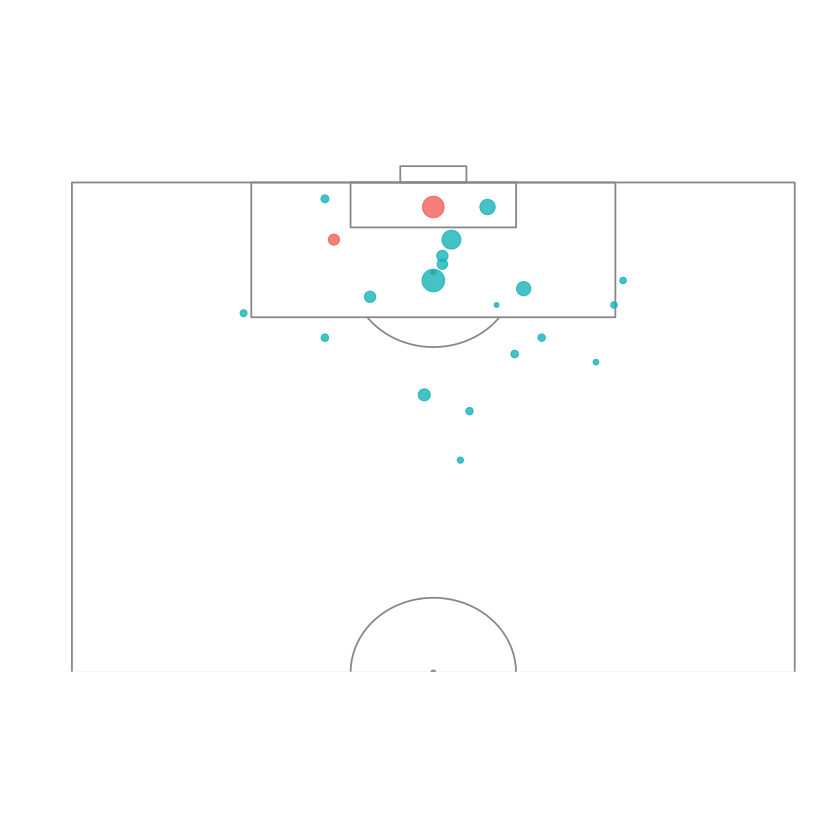

In [45]:
soccerShotmap(shots_marta, lengthPitch = 120, widthPitch = 80, colMiss = "red", colGoal = "blue")